In [54]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [55]:
path='/home/drallab/datamining/Data_Mining_final_project/Opinion_Mining_Yelp/amazon_reviews.txt'
df1 = pd.read_table(path)
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
DOC_ID               21000 non-null int64
LABEL                21000 non-null object
RATING               21000 non-null int64
VERIFIED_PURCHASE    21000 non-null object
PRODUCT_CATEGORY     21000 non-null object
PRODUCT_ID           21000 non-null object
PRODUCT_TITLE        21000 non-null object
REVIEW_TITLE         21000 non-null object
REVIEW_TEXT          21000 non-null object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [56]:
df1.info()
df1 = df1[(df1.RATING == 5) | (df1.RATING == 1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
DOC_ID               21000 non-null int64
LABEL                21000 non-null object
RATING               21000 non-null int64
VERIFIED_PURCHASE    21000 non-null object
PRODUCT_CATEGORY     21000 non-null object
PRODUCT_ID           21000 non-null object
PRODUCT_TITLE        21000 non-null object
REVIEW_TITLE         21000 non-null object
REVIEW_TEXT          21000 non-null object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [57]:
df1.dropna(inplace=True)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13967 entries, 9 to 20998
Data columns (total 9 columns):
DOC_ID               13967 non-null int64
LABEL                13967 non-null object
RATING               13967 non-null int64
VERIFIED_PURCHASE    13967 non-null object
PRODUCT_CATEGORY     13967 non-null object
PRODUCT_ID           13967 non-null object
PRODUCT_TITLE        13967 non-null object
REVIEW_TITLE         13967 non-null object
REVIEW_TEXT          13967 non-null object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


In [59]:
df1.isnull().values.any()

False

In [60]:
df1.head()

DOC_ID       LABEL  RATING VERIFIED_PURCHASE        PRODUCT_CATEGORY  \
9       10  __label1__       1                 N  Health & Personal Care   
10      11  __label1__       1                 N  Health & Personal Care   
32      33  __label1__       1                 N                Wireless   
39      40  __label1__       1                 N  Health & Personal Care   
49      50  __label1__       1                 N                  Beauty   

    PRODUCT_ID                                      PRODUCT_TITLE  \
9   B00H4IBD0M  Sheer TEST, Best Testosterone Booster Suppleme...   
10  B00VQNLQL2  #1 Most Potent Male Performance Enhancement Su...   
32  B00FA9DMDS  iPhone 5S Case, Caseology [Fusion Series] Scra...   
39  B00N26SVO6  MaleMax Sexual Performance Pills Increase Size...   
49  B00EILBYDO  L'Oreal Paris Vive Pro for Men 2-in-1 Daily Th...   

                                REVIEW_TITLE  \
9   WARNING: do not waste your money on this   
10    Unfortunately they didn't work for me.   
32                             Changed color   
39           Waist Of money reviews are fake   
49                stripped more hair from me   

                                          REVIEW_TEXT  
9   Everybody wants to fall for their promises. Bu...  
10  Unfortunately they didn't work for me. They ma...  
32  The sides of the case didn't match my phone at...  
39  No go. All the reviews are fake. Buyer be ware...  
49  I had high hopes for a thickening shampoo inst...

In [61]:
X_data = df1['REVIEW_TEXT']
y_data = df1['RATING']

In [62]:
X_data.shape


(13967,)

In [63]:
y_data.shape

(13967,)

In [64]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_data,y_data,test_size =0.3,random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(9776,)
(4191,)
(9776,)
(4191,)


In [65]:
#CountVectorizer shall be used to work on text data
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<9776x23605 sparse matrix of type '<class 'numpy.int64'>'
	with 451863 stored elements in Compressed Sparse Row format>

In [66]:
#Vectorize Test data
X_test_dtm = vect.transform(X_test)

In [67]:
#Encode 1 and 5 rating
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [68]:
#using GridsearchCV for parameter selection and tuning.

from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV


grid = GridSearchCV(LogisticRegression(),param_grid={'C':np.arange(1,20,0.2),'penalty':['l1','l2']},cv=10)
grid.fit(X_train_dtm,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 1. ,  1.2, ..., 19.6, 19.8]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [69]:
# predict 
grid.predict(X_test_dtm)

array([1, 1, 1, ..., 0, 1, 1])

In [70]:
# Best params
grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [71]:
#Best Score
grid.best_score_

0.9395458265139116

In [72]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=4.19,penalty='l2')
log_reg.fit(X_train_dtm,y_train)

LogisticRegression(C=4.19, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
#predict
logr_pred = log_reg.predict(X_test_dtm)
print (logr_pred)

[1 1 1 ... 0 1 1]


In [74]:
#lets analyse 25 elements of predicted and test y labels , 0 means 1 rating and 1 means 5 rating 
print('Predicted',(logr_pred[:25]))
print('True     ',(y_test[:25]))

Predicted [1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]
True      [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1]


In [75]:
from sklearn import metrics
print ('accuracy score',metrics.accuracy_score(y_test,logr_pred))

accuracy score 0.9405869720830351


In [76]:
#Lets see the confusion metrix 
conf_matrix=metrics.confusion_matrix(y_test,logr_pred)
print ('confusion matrix \n',conf_matrix)

confusion matrix 
 [[ 364  157]
 [  92 3578]]


In [77]:
#visualize

pd.crosstab(y_test, logr_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0     1   All
True                      
0          364   157   521
1           92  3578  3670
All        456  3735  4191

Recall score 0.9749318801089918
ROC_AUC_SCORE:-  0.8367941550257051


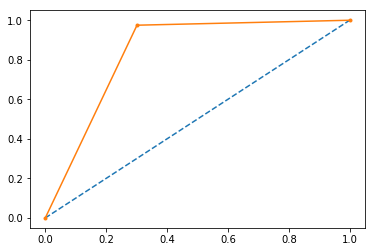

In [80]:
#Sensitivity : is the classifier to detecting positive instances , also True Positive Rate" or "Recall"
recall_logr= metrics.recall_score(y_test,logr_pred)
print ('Recall score',recall_logr)




auc_val = metrics.roc_auc_score(y_test,logr_pred)
print('ROC_AUC_SCORE:- ', auc_val)
import matplotlib.pyplot as plt



from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test,logr_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [81]:
#Precision: When a positive value is predicted, how often is the prediction correct?
#How "precise" is the classifier when predicting positive instances?

Precision_logr= metrics.precision_score(y_test,logr_pred)
print('Precision Score', Precision_logr)

Precision Score 0.9579651941097724


In [82]:
#print rating 1 reviews which are falsely callisified as positive i.e rating 5 ,diplay False Postive review comments
X_test[(logr_pred == 1) & (y_test == 0)]

20947    No fooling anybody here, definitely faux. Cute...
12419    The shirts they send out are different from th...
2238     This cover comes in great colors (I picked the...
19130    I was really surprised at the low price for an...
2275     A few months ago I had just gotten the Xbox On...
14024    This harness actually melted and shorted itsel...
20803    Wow! Sleeves are super, super short! Shirt was...
4065     I can't imagine anyone wearing these leggings ...
2948     i think a two year old got behind the camera o...
1204     My bull dogs are scared to go outseld because ...
19840    I found this on my list of things I hadn't rev...
674      I was so happy to find this wonderful toolkit,...
11730    Why does the manufacturer take a perfectly nic...
2551     My roommate and I thought that this would be a...
3718     I had ordered a King size Fiber bed but the on...
11972    In my opinion Formbys has always been worthles...
16931    Warning to all that buy this!!!!!!!:  The plea.

In [83]:
#print rating 5 reviews which are falsely callisified as negative i.e rating 1,diplay True Negative review comments
X_test[(logr_pred == 0) & (y_test == 1)]

13145    One of the funniest movies I've ever seen.  Sc...
14331    Tried this product last night. Not on my cast ...
19132    I bought this and expected it would take a mon...
16801    Trying to find a tactful way to review this pr...
14155    It's loud, clear.  Sound don't get distorted. ...
16037    The cabe that attaches from the headset to the...
15610    The common problem I find with these things is...
7360     This ink cartridge was everything I hoped for ...
10443    The DVD player was an upgrade to our old Phill...
11427    I cannot write anything bad about this item......
6255     I compared a few units for hoisting my kayaks ...
9252     You can just spend hours playing this game and...
12496    I went to my doctor and she said that I had &#...
8223     Skeptical at first until I tried it on my dark...
19738    When I read the reviews, some said that the pl...
9393     Ok, so I knew going in that this was multi-pla...
15621    Looked up reviews that showed this dog had les.

In [44]:
X_test[15842]

"Hi<br /><br />This is a wonderful product.  If has made walking my dogs a pleasure again.  Before the sporn pet halter my arms ached and I put off walking the dogs, now can't wait to go for walkies.  I have recommended this product to several friends.<br />I do see that there is a chance of fraying on the part of the halter that locks it down to the correct.  I don't know if I have been careless adjusting it or it's just a small flaw.  If it's a problem later on I'll buy another, believe me worth it."

In [84]:
#Lets print classifcation report
class_report = metrics.classification_report(y_test,logr_pred)
print (class_report)

             precision    recall  f1-score   support

          0       0.80      0.70      0.75       521
          1       0.96      0.97      0.97      3670

avg / total       0.94      0.94      0.94      4191

